In [ ]:
import numpy as np
import scipy.stats as ss

def d1(S0, K, r, sigma, T):
    return (np.log(S0/K) + (r + sigma**2 / 2) * T)/(sigma * np.sqrt(T))

def d2(S0, K, r, sigma, T):
    return (np.log(S0 / K) + (r - sigma**2 / 2) * T) / (sigma * np.sqrt(T))

def BlackScholes(type,S0, K, r, sigma, T):
    if type=="C":
        return S0 * ss.norm.cdf(d1(S0, K, r, sigma, T)) - K * np.exp(-r * T) * ss.norm.cdf(d2(S0, K, r, sigma, T))
    else:
        return K * np.exp(-r * T) * ss.norm.cdf(-d2(S0, K, r, sigma, T)) - S0 * ss.norm.cdf(-d1(S0, K, r, sigma, T))

In [2]:
#from pylab import *
from matplotlib import pyplot as pl

np.random.seed(150000)
# Model Parameters
S0    = 36.0   # initial stock level
K     = 40.0   # strike price
T     = 1.00   # time-to-maturity
r     = 0.06   # short rate
sigma = 0.20   # volatility

# Simulation Parameters
I = 10000   # number of paths
M = 50      # number of points for each path
dt = T / M
df = np.exp(-r * dt)

# Stock Price Paths
S    = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.random.standard_normal((M + 1, I)), axis=0))
S[0] = S0


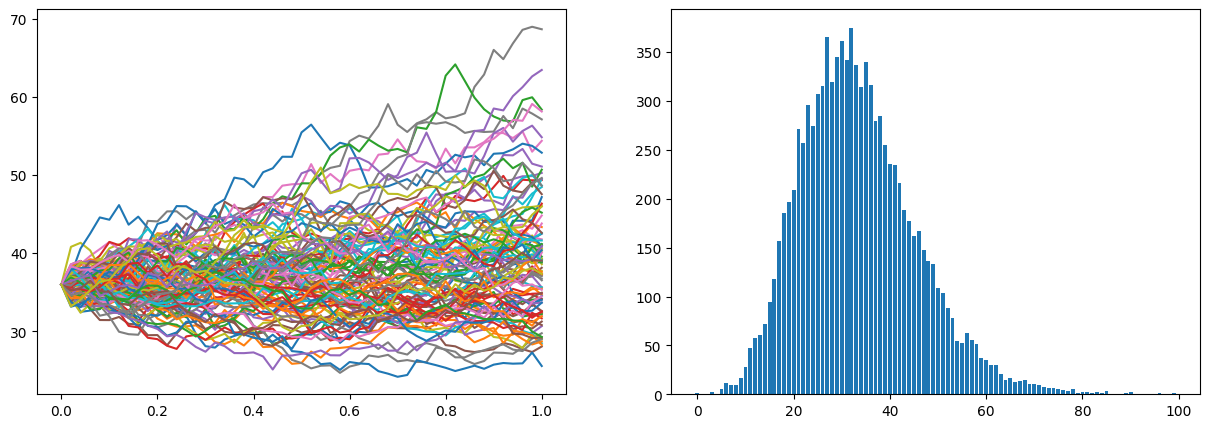

In [3]:
# plotting the first 1000 paths
t = np.linspace(0, T, M+1)
paths = S[:,1:100]

# plotting expiry price distribution
expiry = S[-1,:]
hist = np.histogram(expiry, 100)
index = np.arange(100)

pl.figure(figsize=(15,5))
pl.subplot(121)
pl.plot(t, paths)

pl.subplot(122)
pl.bar(index, hist[0])

pl.show()

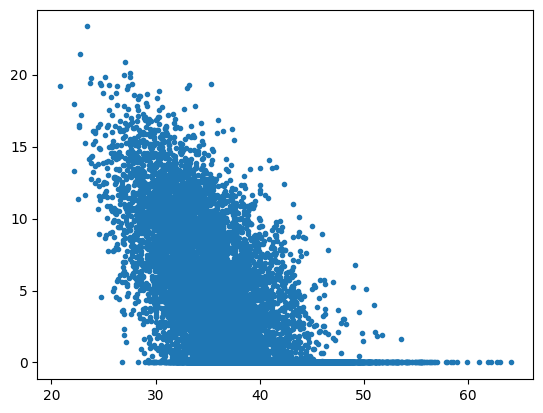

In [5]:
import matplotlib.pyplot as plt

# the value n = 25 is simply to emulate the example with only two exercise times
n = 25
maturity  = S[50,:]
reference = S[50-n,:]
payoff = np.maximum(K-maturity,0)*np.exp(-r *n*dt)
pl.plot(reference, payoff,'.')
plt.show()

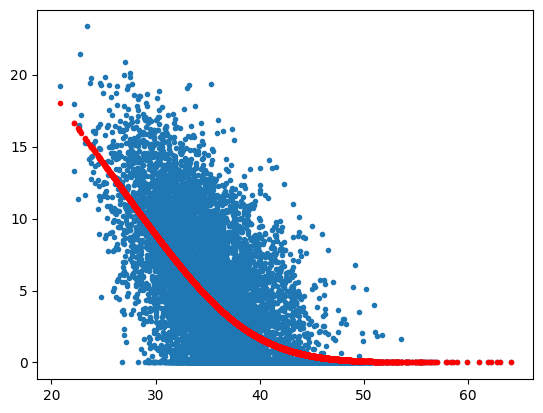

In [6]:
C = BlackScholes('P',reference, K, r, sigma, 0.5*T)

pl.plot(reference, payoff,'.')
pl.plot(reference, C, '.', color='r')
plt.show()

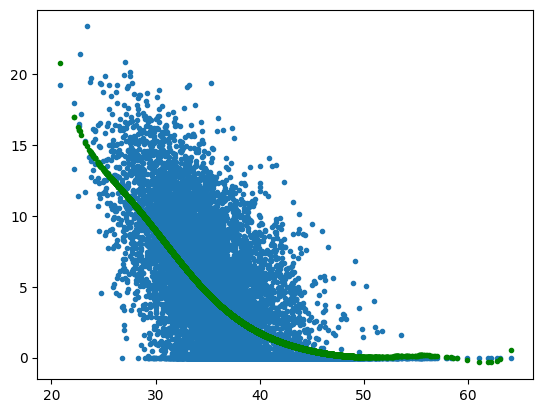

In [7]:
npol = 9
rg   = np.polyfit(reference, payoff, npol)
yy   = np.polyval(rg, reference)

plt.plot(reference, payoff,'.')
plt.plot(reference, yy,'.',color='g')
plt.show()

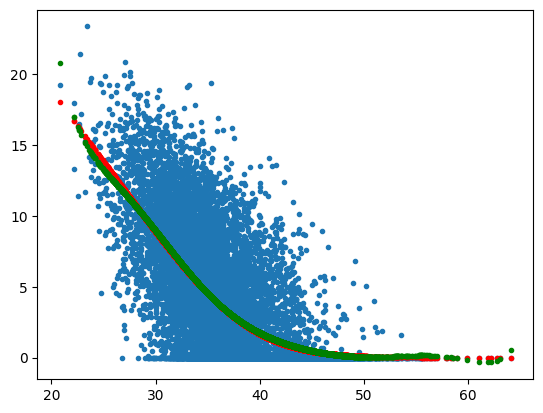

In [8]:
pl.plot(reference, payoff,'.')
pl.plot(reference, C, '.', color='r')
pl.plot(reference, yy,'.', color='g')
plt.show()

In [11]:
import math
import numpy as np

np.random.seed(150000)

S0 = 36.
K = 40.
T = 1.0
r = 0.06
sigma = 0.2

I = 25000
M = 50
dt = T / M
df = math.exp(-r * dt)

S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * np.random.standard_normal((M + 1, I)), axis=0))
S[0] = S0

h = np.maximum(K - S, 0)
V = h[-1]

for t in range(M - 1, 0, -1):
    rg = np.polyfit(S[t], V * df, 5)
    C  = np.polyval(rg, S[t])
    V  = np.where(h[t] > C, h[t], V * df)
V0 = df * np.sum(V) / I

print (f"American put option value {V0:5.3f}")

American put option value 4.475
